

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [3]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
%pip install pandas
import pandas as pd

DATASET = 'Data2.csv'
df = pd.read_csv(DATASET, sep=';', encoding='cp1252')

Note: you may need to restart the kernel to use updated packages.


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [4]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
pd.set_option('display.max_rows', None);
#let's look at heading (column's name)
print(df.columns)

#looking at all data
df.info

#there is only one column - "Population"
df.describe()

#Look at all info about every column, not only "Population"
#For this use include="all"
df.describe(include="all")

#We have missing values alredy marked as NaN

#Let's check the data types of columns
df.dtypes

#As we discovered that columns which have the numbers should have the float datatype, 
#let's check if we have not data with '-' symbol, as all numbers should be positive in our case
negative_check = df.applymap(lambda x: str(x).strip().startswith("-") if pd.notna(x) else False)
print(negative_check.any()) 

#We have a '-' symbol in column "Area"

#So let's check wich column has empty data
empty_counts = (df.isna() | (df == "")).sum()
print(empty_counts[empty_counts > 0])

missing_data = df.isnull()
missing_data.head() #True - value is empty

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
#GDP per capita, Population and Area columns have empty values


Index(['Country Name', 'Region', 'GDP per capita', 'Populatiion',
       'CO2 emission', 'Area'],
      dtype='object')
Country Name      False
Region            False
GDP per capita     True
Populatiion       False
CO2 emission      False
Area               True
dtype: bool
GDP per capita    27
Populatiion        1
CO2 emission      12
dtype: int64
Country Name
Country Name
False    217
Name: count, dtype: int64

Region
Region
False    217
Name: count, dtype: int64

GDP per capita
GDP per capita
False    190
True      27
Name: count, dtype: int64

Populatiion
Populatiion
False    216
True       1
Name: count, dtype: int64

CO2 emission
CO2 emission
False    205
True      12
Name: count, dtype: int64

Area
Area
False    217
Name: count, dtype: int64



/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_8297/4157992934.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  negative_check = df.applymap(lambda x: str(x).strip().startswith("-") if pd.notna(x) else False)


Бачу наступні проблеми в даних:
1. Некоректні назви стовпчика "Populatiion". Повинно бути "Population"
2. В стовпчиках GDP per capita, CO2 emission, Area значення відокремлюються комою. Числові значення повинні відокремлюватись крапкою
3. Такі стовпці як GDP per capita, CO2 emission, Area мають тип object. Натомість потрібно встановити тип значення float, оскільки дані, що містять ці стовпці є числовими.
4. Стовпець "Area" має негативні значення.
5. У стовпчиках "GDP per capita", "Populatiion", "Area" є пусті поля.



<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1.</b>
<p>
    Для виправлення зміню назву "Populatiion" на коректну "Population"
</p>

In [7]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.rename(columns={"Populatiion": "Population"}, inplace=True)
print(df.columns)

Index(['Country Name', 'Region', 'GDP per capita', 'Population',
       'CO2 emission', 'Area'],
      dtype='object')


<b>Проблема 2.</b>
<p>
    Для виправлення заміню знак "кома" на знак "крапка" у стовпчиках GDP per capita та CO2 emission
</p>

In [6]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
columns_to_add_dots = ["GDP per capita", "CO2 emission", "Area"]

df[columns_to_add_dots] = df[columns_to_add_dots].apply(lambda x: x.str.replace(",", ".", regex=False))
print(df[columns_to_add_dots].head())

  GDP per capita CO2 emission     Area
0    561.7787463     9809.225   652860
1     4124.98239     5716.853    28750
2    3916.881571   145400.217  2381740
3    11834.74523          NaN      200
4    36988.62203      462.042      470


<b>Проблема 3.</b>
<p>
    Для виправлення зміню типи даних стовпців GDP per capita, CO2 emission, Area тип даних на float
</p>

In [9]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
columns_to_convert = ["GDP per capita", "CO2 emission", "Area"]
df[columns_to_convert] = df[columns_to_convert].astype(float)
print(df.dtypes)
df.head()

Country Name       object
Region             object
GDP per capita    float64
Population        float64
CO2 emission      float64
Area              float64
dtype: object


,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


<b>Проблема 4.</b>
<p>
    Для виправлення приберу знак "-" у стопчику Area та GDP per capita
</p>

In [8]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df["Area"] = df["Area"].abs()
print(df["Area"].head())

df['GDP per capita'] = df['GDP per capita'].abs()

negative_count = (df['Area'] < 0).sum()
positive_count = (df['Area'] >= 0).sum()
print(negative_count, positive_count)

0     652860.0
1      28750.0
2    2381740.0
3        200.0
4        470.0
Name: Area, dtype: float64
0 217


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Заповнювати пропуски для ознаки "GDP per capita" буду середнім значенням, тому що у нас лише не велика частина даних в комірках відсутня, тому ми не можемо собі дозволити на стільки радикальну дію. Те ж саме стосується стовпчика Population, де у нас лише одне пусте значення - тому ми теж замінимо його середнім. І аналогічно зі стопцем CO2 emission, який містить 12 пустих комірок, тому ми теж замінимо на середнє значення.

In [40]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import numpy as np

avg_population = round(df['Population'].astype('float').mean())
print("Average value of population: ", avg_population)

avg_gdp = df['GDP per capita'].astype('float').mean(axis=0)
print("Average value of GDP per capita: ", avg_gdp)

avg_emission = df['CO2 emission'].astype('float').mean(axis=0)
print("Average value of CO2 emission: ", avg_emission)

df['Population'] = df['Population'].fillna(avg_population)
df['GDP per capita'] = df['GDP per capita'].fillna(avg_gdp)
df['CO2 emission'] = df['CO2 emission'].fillna(avg_emission)

Average value of population:  34322560
Average value of GDP per capita:  13445.593416057369
Average value of CO2 emission:  165114.1163365854


Досліджую структуру даних, чи всі пропуски заповнено


In [97]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Country Name
Country Name
False    217
Name: count, dtype: int64

Region
Region
False    217
Name: count, dtype: int64

GDP per capita
GDP per capita
False    217
Name: count, dtype: int64

Population
Population
False    217
Name: count, dtype: int64

CO2 emission
CO2 emission
False    217
Name: count, dtype: int64

Area
Area
False    217
Name: count, dtype: int64



 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую по формулі такій-то і додам у стовпчик такий-то.


In [16]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['Population Density'] = df['Population'] / df['Area'].replace(0, np.nan)
print(df["Population Density"])

0         53.083405
1        100.038296
2         17.048902
3        277.995000
4        164.427660
5         23.111786
6        229.461364
7         15.770188
8         98.346200
9        582.344444
10         3.116713
11       104.285435
12       112.728337
13        28.186744
14      1848.470817
15      1103.783513
16       662.781395
17        45.795376
18       371.705175
19        15.975359
20        94.739439
21      1306.620000
22        20.778377
23         9.910869
24        68.674400
25         3.868221
26        24.384508
27       204.406667
28        73.344194
29        64.214613
30        67.998078
31       378.157276
32       133.885856
33        87.065676
34        49.299994
35         3.634214
36       230.170455
37         7.375230
38        11.255875
39       866.005263
40        23.687143
41       144.167921
42        42.613060
43       427.512628
44        33.578189
45        14.987781
46        95.054286
47        73.484832
48        73.698533
49       104.441045


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


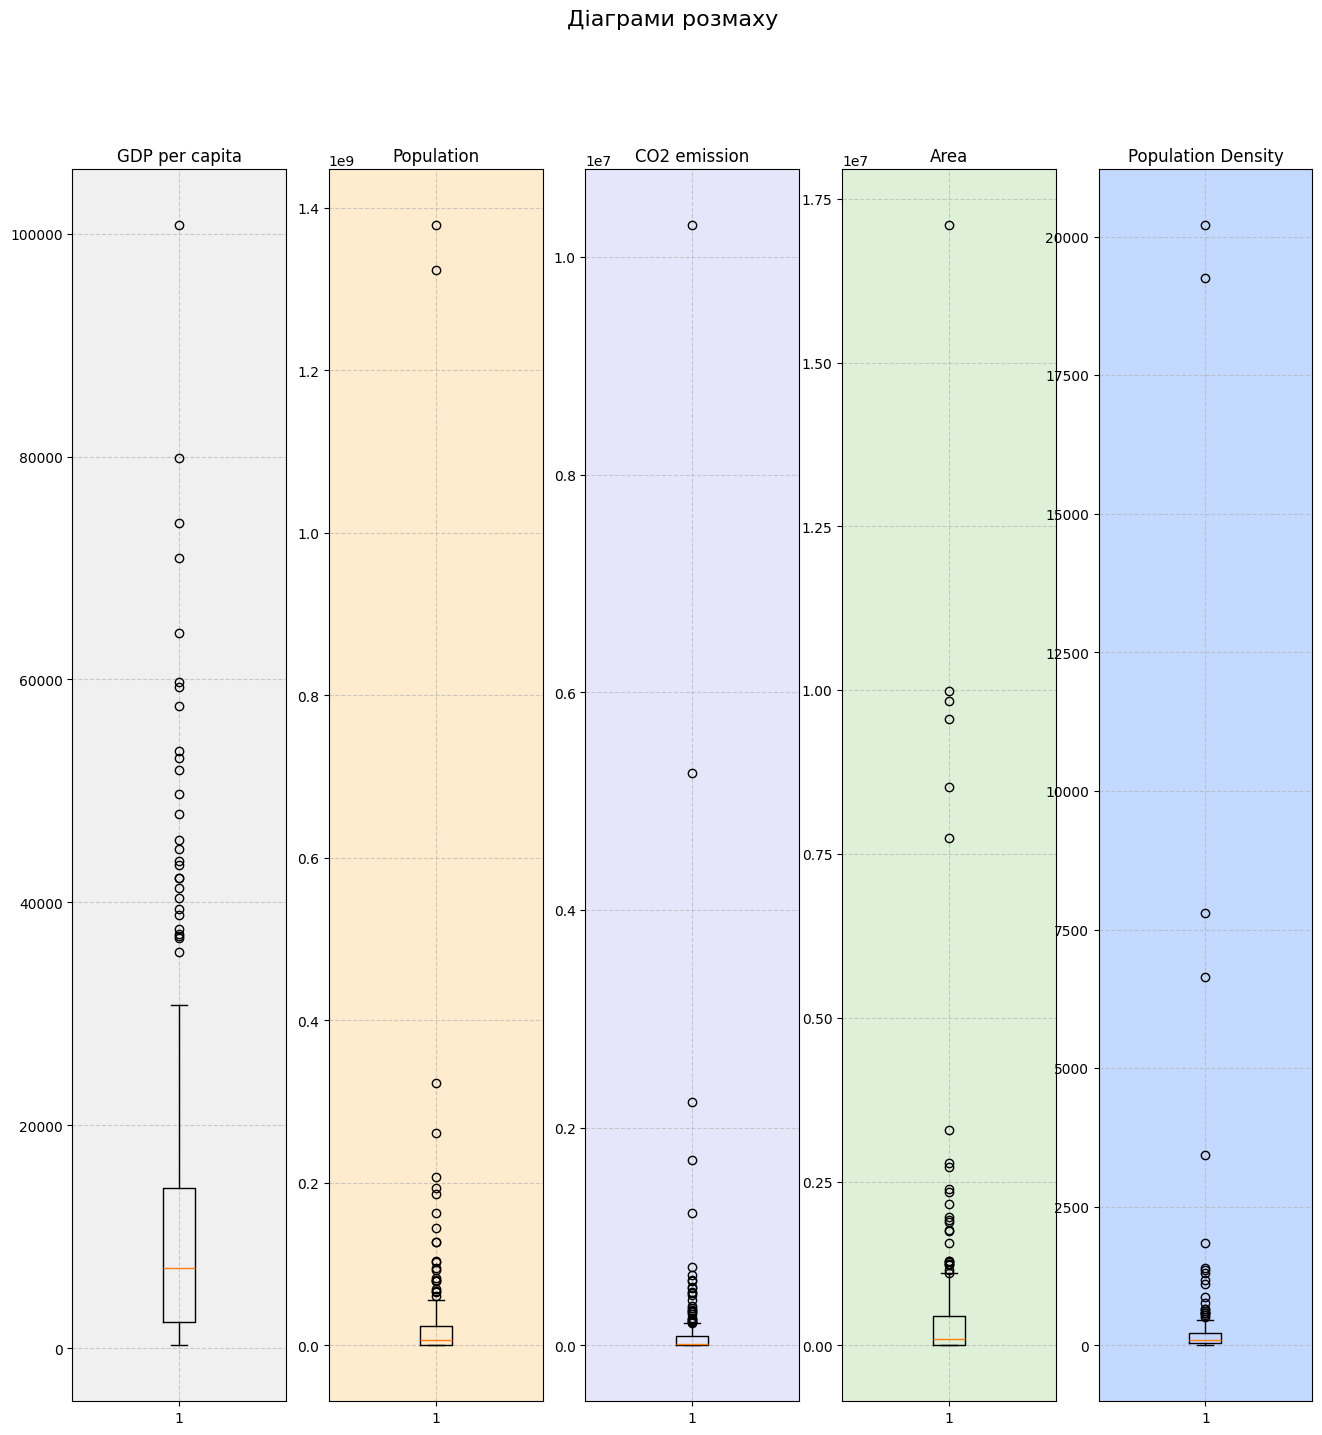

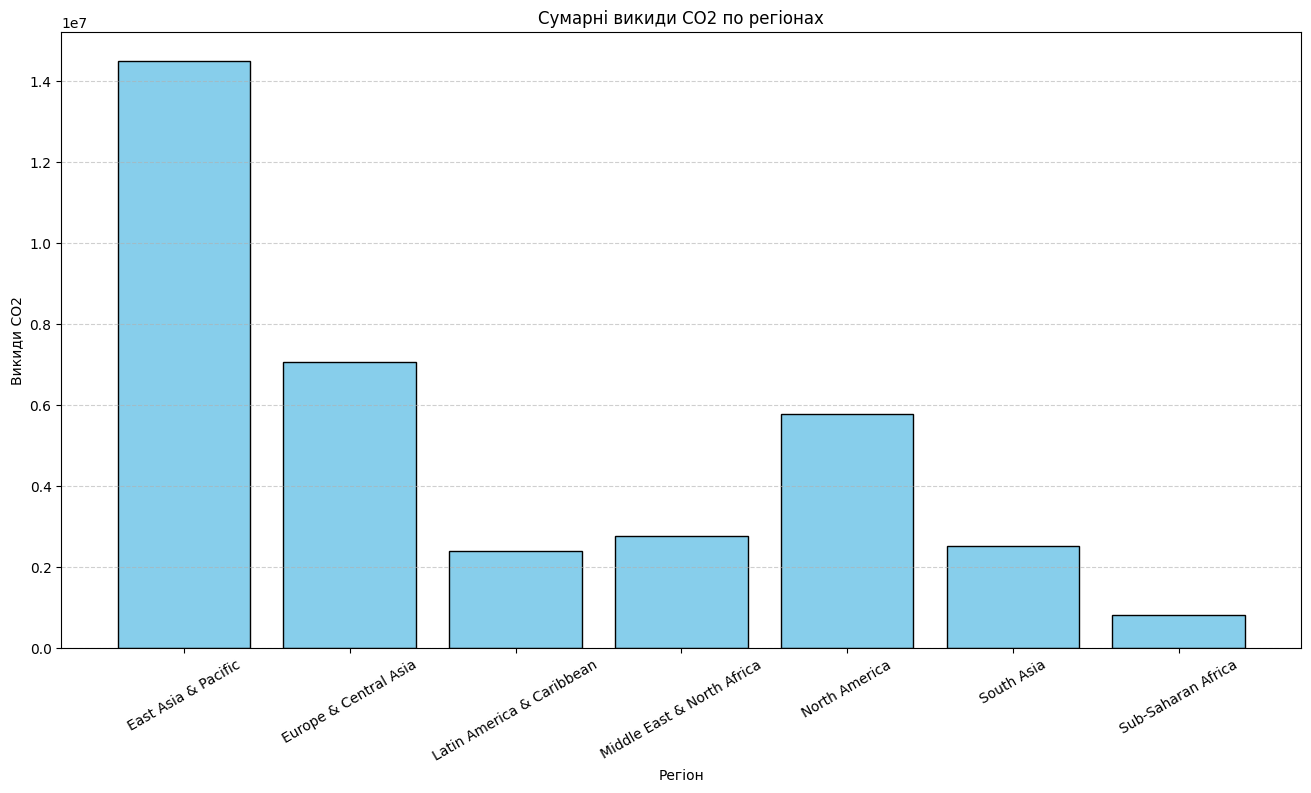

In [29]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt
    
fig, axs = plt.subplots(1, 5, figsize=(16, 16))

fig.suptitle('Діаграми розмаху', fontsize=16)

for ax in axs:
    ax.grid(True, linestyle="--", alpha=0.6)


axs[0].set_facecolor('#f0f0f0')  
axs[1].set_facecolor('#ffebcd')  
axs[2].set_facecolor('#e6e6fa')  
axs[3].set_facecolor('#dff0d8')  
axs[4].set_facecolor('#c4d9ff')  

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

axs[4].set_title('Population Density')
axs[4].boxplot(df['Population Density'])

plt.show()

#2nd
region_co2 = df.groupby('Region')['CO2 emission'].sum()
plt.figure(figsize=(16, 8))
plt.bar(region_co2.index, region_co2.values, color='skyblue', edgecolor='black')

plt.title("Сумарні викиди CO2 по регіонах")
plt.xlabel("Регіон")
plt.ylabel("Викиди CO2")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [37]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
max_gdp_country = df.loc[df['GDP per capita'].idxmax(), 'Country Name']
max_gdp = df['GDP per capita'].max()
print(f"Country with the highest GDP per capita: {max_gdp_country} ({max_gdp})")

min_area_country = df.loc[df['Area'].idxmin(), 'Country Name']
min_area = df['Area'].min()
print(f'Country with the smallest area: {min_area_country} ({min_area})')

max_density_country = df.loc[df['Population Density'].idxmax(), ['Country Name', 'Population Density']]
df_europe_asia = df[df['Region'] == 'Europe & Central Asia']
max_density_europe_asia = df_europe_asia.loc[df_europe_asia['Population Density'].idxmax(), ['Country Name', 'Population Density']]
print(f"Country with the highest population density in world: {max_density_country['Country Name']} ({max_density_country['Population Density']})")
print(f"Country with the highest population density in Europe and Central Asia: {max_density_europe_asia['Country Name']} ({max_density_europe_asia['Population Density']})")

top_5_gdp = df.nlargest(5, "GDP per capita")[["Country Name", "GDP per capita"]]
bottom_5_gdp = df.nsmallest(5, "GDP per capita")[["Country Name", "GDP per capita"]]
print('TOP5 GDP per capita:')
print(top_5_gdp)
print("")
print('LAST5 GDP per capita:')
print(bottom_5_gdp)

Country with the highest GDP per capita: Luxembourg (100738.6842)
Country with the smallest area: Monaco (2.0)
Country with the highest population density in world: Macao SAR, China (20203.531353135313)
Country with the highest population density in Europe and Central Asia: Monaco (19249.5)
TOP5 GDP per capita:
         Country Name  GDP per capita
115        Luxembourg    100738.68420
188       Switzerland     79887.51824
116  Macao SAR, China     74017.18471
146            Norway     70868.12250
92            Ireland     64175.43824

LAST5 GDP per capita:
                 Country Name  GDP per capita
31                    Burundi      285.727442
119                    Malawi      300.307665
134                Mozambique      382.069330
37   Central African Republic      382.213174
118                Madagascar      401.742270


Збережіть дані у новий файл 'clean_data2.csv':


In [38]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.to_csv('clean_data2.csv', index=False)

<h2>Виконав студент групи ІП-33  <br>Корольчук Олександр</h2>
